DATA OVERVIEW 

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 


In [13]:
#Task 3, Plot 3 line charts for islands, big and small cities 
df = pd.read_csv('C:\\Users\\Harpreet Singh\\Documents\\folder\\subfolder\\final1.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df = df.set_index(['TIME'])

In [14]:
df_temp = df.copy()
df_temp['Minutes'] = pd.to_datetime(df_temp['TIME'], format="%H:%M:%S").dt.minute

In [15]:
df_temp = df_temp.groupby('Minutes').mean().reset_index()

(-500.0, 500.0)

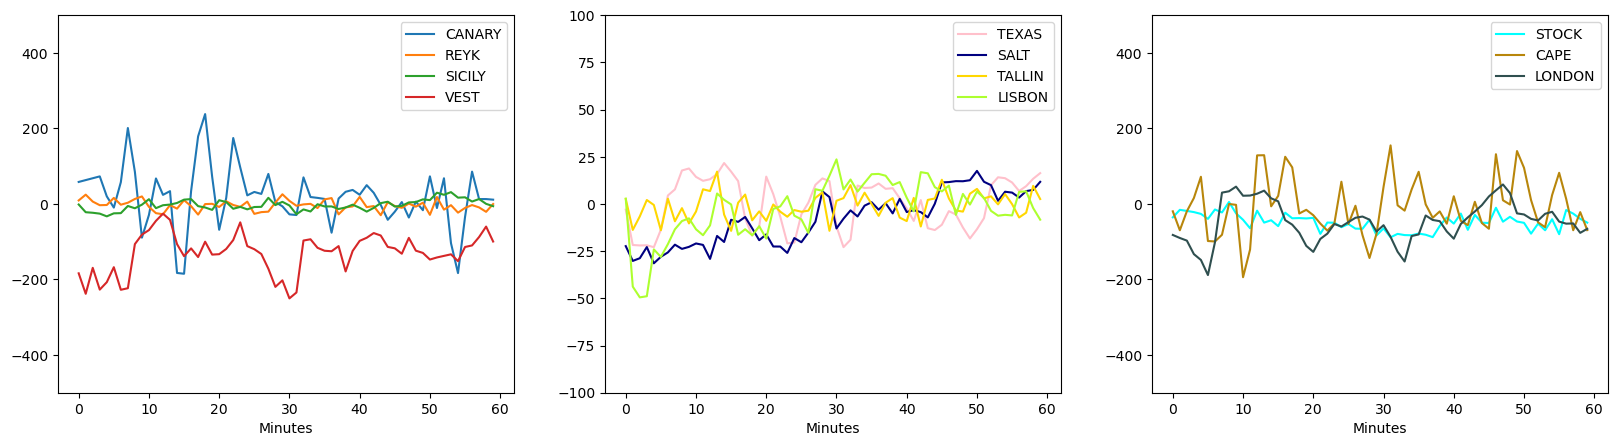

In [16]:
fig,ax = plt.subplots(ncols=3,nrows=1,dpi=100,figsize=(20,5))
df_temp.set_index('Minutes')[['CANARY', 'REYK','SICILY','VEST']].plot(ax = ax[0])
df_temp.set_index('Minutes')[['TEXAS', 'SALT','TALLIN','LISBON']].plot(ax = ax[1], color=['pink','Navy','Gold','GreenYellow'])
df_temp.set_index('Minutes')[['STOCK', 'CAPE','LONDON']].plot(ax = ax[2], color=['Aqua','DarkGoldenrod','DarkSlateGray'])

ax[0].set_ylim((-500, 500))
ax[1].set_ylim((-100, 100))
ax[2].set_ylim((-500, 500))

<AxesSubplot:>

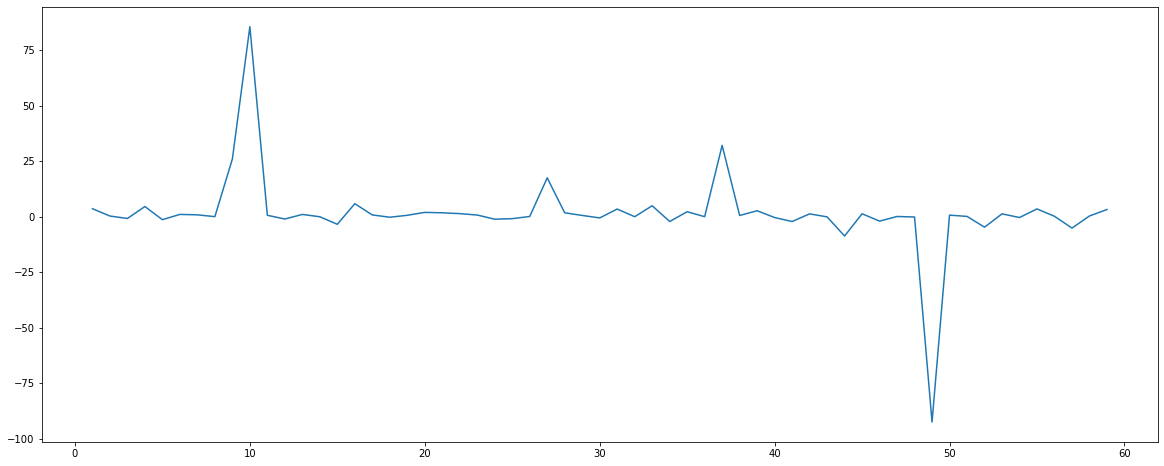

In [21]:
#PERECENTAGE CHNAGE 

df_temp.CAPE.div(df_temp.CAPE.shift()).plot(figsize=(20,8))

<AxesSubplot:>

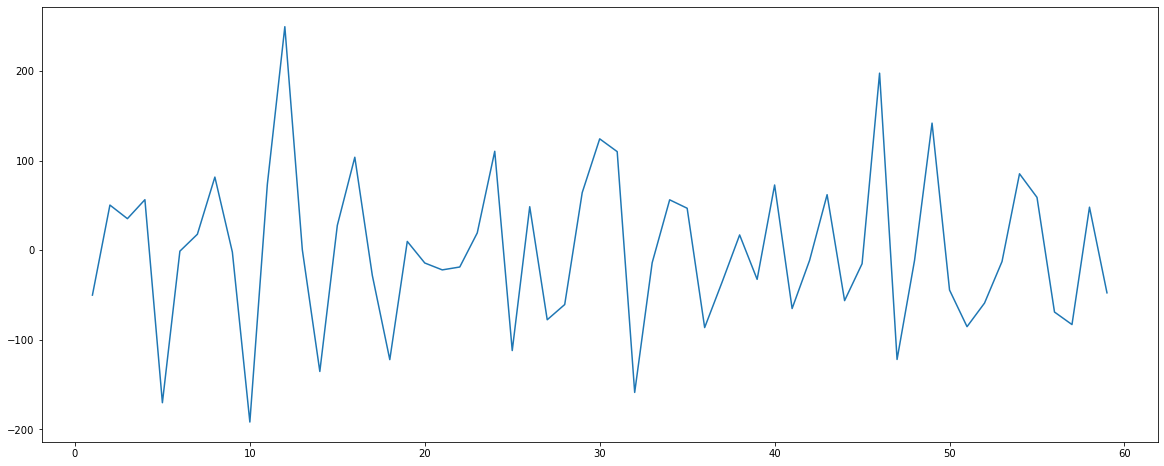

In [24]:
# Absolute Change in succesive rows 

df_temp.CAPE.diff().plot(figsize=(20,8))

<AxesSubplot:>

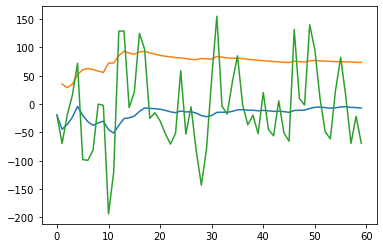

In [28]:
#Expanding Mean and STD 

df_temp.CAPE.expanding().mean().plot() 
df_temp.CAPE.expanding().std().plot()
df_temp.CAPE.plot() 

Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant. 

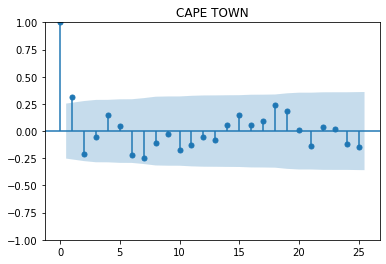

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_temp.CAPE,lags=25,title="CAPE TOWN")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


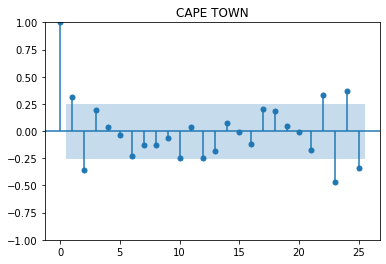

In [31]:
plot_pacf(df_temp.CAPE,lags=25,title="CAPE TOWN")
plt.show()